In [1]:
# Provided by Somayeh Komeylian: PhD Student at UCSD & SDSU #
# Deep Learning #
# Type of dataset (Breast Cancer Dataset): Binary calssification
# Method (Not beginning from scratch): 
    # 1. Sequential model in Keras, which is a linear stack of three fully connected (Dense) layers suitable for a feedforward neural network.
    # 2. Convolutional Neural Network (CNN)

In [5]:
############################### Step 1: Import all the required Libraries ##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV 
import os
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
################ Step 2: Reading (or Loading) the dataset: #################

data = load_breast_cancer()
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [58]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

Text(0.5, 1.0, 'Convolutional Neural Networks')

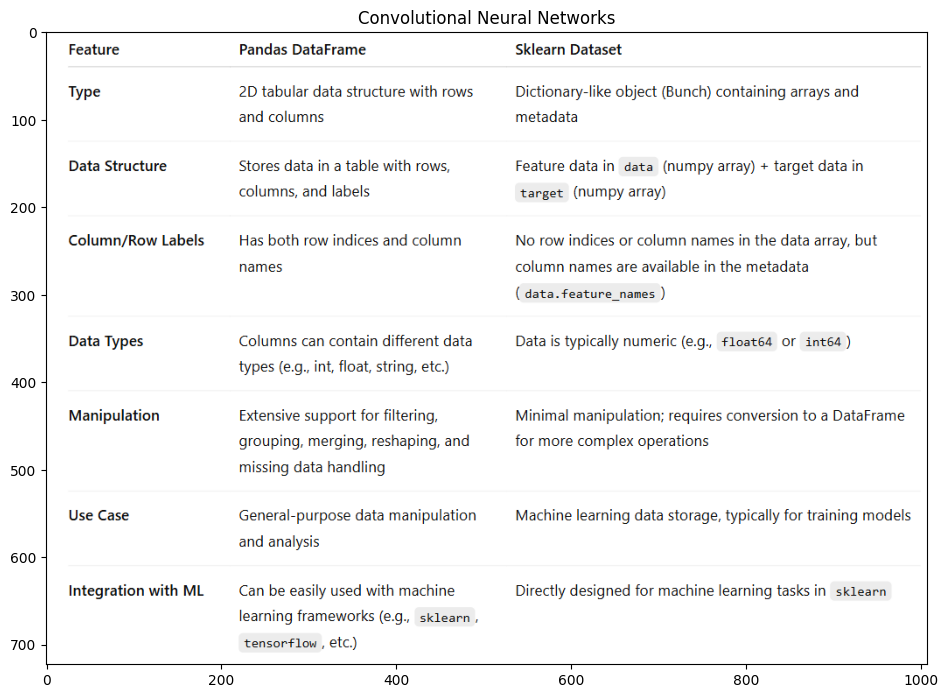

In [18]:
################# Step 3: Inspect Data Type: #################

# The key difference between a pandas DataFrame and datasets like the one from sklearn.datasets lies in their structure, functionality, and use cases. 
#### Structures: ####

#### 1. Pandas DataFrame:
# A pandas DataFrame is a 2-dimensional labeled data structure. 
# It is essentially a table with rows and columns, where each column can be of a different data type (e.g., numeric, categorical, text, etc.).
# It has row indices (default: integers starting from 0) and column labels (which are usually strings and can be set by the user).
# Each column is like a pandas Series, which is essentially a 1-dimensional array with an index.
# Example: 
    # import pandas as pd
    # data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
    # df = pd.DataFrame(data)
    # print(df)
# Output:
#    A  B
# 0  1  4
# 1  2  5
# 2  3  6

#### 2. Sklearn Dataset:
# Datasets from sklearn.datasets (like load_breast_cancer(), load_iris(), etc.) are usually returned as a Bunch object (a dictionary-like object) that contains:
    # data: The feature matrix, usually in the form of a 2D numpy array (shape: [n_samples, n_features]).
    # target: The target variable (if available), typically a 1D array of shape [n_samples].
# Additional attributes such as feature_names, target_names, DESCR (dataset description), etc.
# These datasets do not have row indices or column labels out of the box. However, they do provide feature names and other metadata.

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('b7.png')
plt.figure(figsize=[25,25])
plt.subplot(121); plt.imshow(img[...,::-1]); plt.title('Convolutional Neural Networks')

In [19]:
################# Step 3: Inspect Data Type: #################

# The reason we often convert datasets like the one from sklearn.datasets (such as load_breast_cancer()) into a DataFrame is to make the data easier to work with and manipulate. 
# Here are some specific advantages of using a pandas DataFrame:
#### 1. Easy Access to Data and Features
# Structured Data Representation: A DataFrame gives you a tabular format (rows and columns) that's intuitive and easy to work with.
# Column Names: With pandas, you can directly use column names (e.g., df['mean radius']) instead of working with array indices, which makes your code more readable.
#### 2. Data Inspection and Analysis
# Descriptive Statistics: You can easily inspect summary statistics (mean, standard deviation, etc.) using .describe() or .info().
# Quick Overview: The .info() method gives you a quick summary of the data, such as the number of entries, column types, and missing values, which is helpful for understanding the dataset's quality and completeness.
#### 3. Data Cleaning and Preprocessing
# Handling Missing Values: In pandas, it's easier to detect and handle missing values with methods like .isnull() and .dropna().
# Feature Engineering: Adding new columns, transforming existing columns, or dropping columns is very straightforward with pandas (e.g., df['new_feature'] = df['old_feature'] * 2).
#### 4. Data Manipulation
# Filtering and Selection: You can use powerful selection methods to filter rows or columns based on specific conditions (e.g., df[df['target'] == 0] to filter all samples with class 0).
# Grouping: You can easily group data based on categories or target labels and apply aggregation functions, which is helpful when dealing with categorical or class-based data.
#### 5. Integration with Other Libraries
# Machine Learning: Many libraries like scikit-learn, matplotlib, and seaborn work seamlessly with pandas DataFrames. 
# For instance, train_test_split() can take pandas DataFrames, and you can easily pass DataFrames into scikit-learn models.
# Visualization: You can quickly plot data from a DataFrame using pandas' integration with matplotlib or seaborn.

In [ ]:
################# Step 3: Inspect Data Type: #################

from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Now you can use .info()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [20]:
################# Step 3: Inspect Data Type: #################

x = data.data
y = data.target

In [21]:
################# Step 3: Inspect Data Type: #################

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

print(data.target_names)      # target names
print(np.unique(data.target)) # unique target values


['malignant' 'benign']
[0 1]


In [23]:
################# Step 3: Inspect Data Type: #################

from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['target'] = data.target

# Check for missing values in each column
print("Missing values in each column:")
print(df.isna().sum())

# To further inspect, let's also print the total number of missing values in the entire dataset
print("\nTotal missing values in the dataset:", df.isna().sum().sum())

Missing values in each column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Total missing values in the dataset: 0


In [32]:
################# Step 3: Inspect Data Type: #################

# Import necessary libraries
from sklearn.datasets import load_breast_cancer  # Or any other dataset from sklearn
import pandas as pd

# Load the dataset from sklearn
data = load_breast_cancer()

# Convert the feature matrix to a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# View the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())

# Get summary statistics
print("\n\nSummary statistics:")
print(df.describe())

# Optional: Check DataFrame info (column types, non-null counts)
print("\nDataFrame info:")
print(df.info())


First few rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  

In [33]:
################# Step 3: Inspect Data Type: #################

from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Check duplicated rows
print(df.duplicated().sum())

0


In [34]:
################# Step 4: Split the data into training and testing sets: #################

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f"x_train.shape is {x_train.shape} \ny_train.shape is {y_train.shape} \nx_test.shape is {x_test.shape} \ny_test.shape is {y_test.shape}")

x_train.shape is (455, 30) 
y_train.shape is (455,) 
x_test.shape is (114, 30) 
y_test.shape is (114,)


In [35]:
################# Step 5: Define the Model Architecture: #################

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (30, ))) 
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()

C:\Users\komey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,626 (18.07 KB)

 Trainable params: 4,626 (18.07 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
################# Step 6: Compile and Fit the model: #################

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_split = 0.2)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4451 - loss: 14.9948 - val_accuracy: 0.6374 - val_loss: 5.8701
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5165 - loss: 2.9961 - val_accuracy: 0.6703 - val_loss: 3.2581
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6923 - loss: 1.2121 - val_accuracy: 0.8571 - val_loss: 1.5744
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7665 - loss: 1.1128 - val_accuracy: 0.8681 - val_loss: 1.5335
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8352 - loss: 0.7271 - val_accuracy: 0.8681 - val_loss: 1.3522
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8709 - loss: 0.5104 - val_accuracy: 0.8901 - val_loss: 1.4814
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8544 - loss: 0.5684 - val_accuracy: 0.7692 - val_loss: 2.3246
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8626 - loss: 0.6313 - val_accuracy: 0.8571 - 

In [39]:
################# Step 7: Evaluate the model performance: #################

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"\nTest Loss: {loss:.4f}")


Test Accuracy: 0.9298

Test Loss: 0.1639


In [40]:
################# Step 8: Make predictions: #################

predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

print("\nPredicted labels:", predicted_labels)
print("True labels:     ", y_test[:5])
print("Target names:", data.target_names)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step

Predicted labels: [1 0 0 1 1]
True labels:      [1 0 0 1 1]
Target names: ['malignant' 'benign']



Confusion Matrix:
[[40  3]
 [ 1 70]]


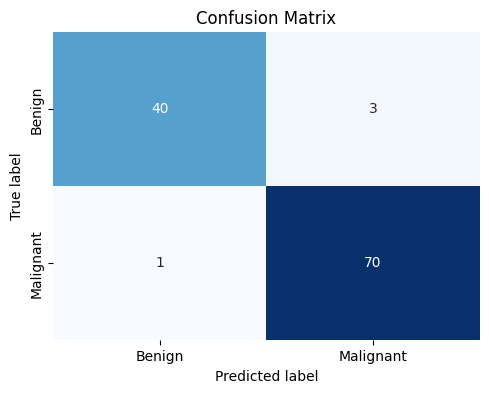

In [43]:
################# Step 8: Evaluate the model performance: #################
# Confusion matrix:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Use a classifier model (example)
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = load_breast_cancer()

# Convert to DataFrame for easier manipulation (optional)
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], test_size=0.2, random_state=42)

# Initialize the model (RandomForest in this case)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(x_train, y_train)

# 1. Get predictions for the entire test set
y_pred = model.predict(x_test)

# 2. Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("\nConfusion Matrix:")
print(cm)

# 3. (Optional) Plot the confusion matrix for better visualization
class_names = ['Benign', 'Malignant']  # The class names in the Breast Cancer dataset
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


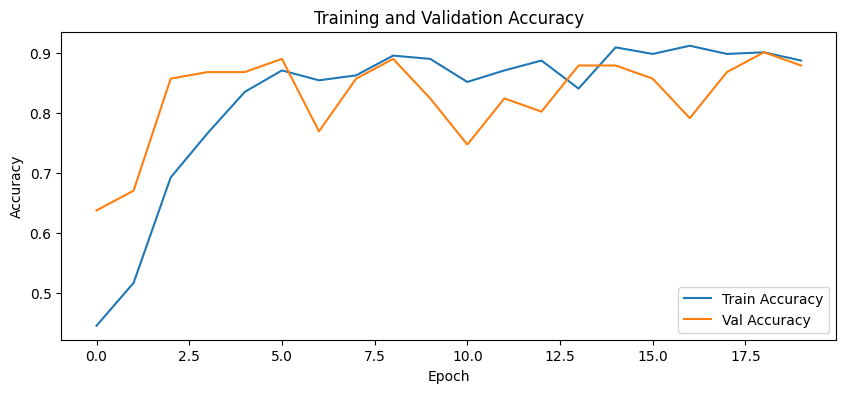

In [44]:
################# Step 8: Evaluate the model performance: #################

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


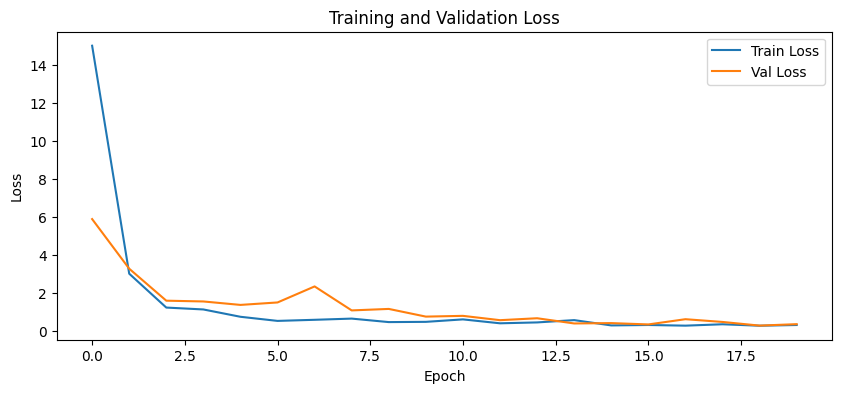

In [45]:
################# Step 8: Evaluate the model performance: #################

# Loss Plot: Loss visualization 
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
